<a href="https://colab.research.google.com/github/Shubhamprasad1995/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

## **Import Libraries and Data.**

In [1]:
# Import libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
import plotly.offline as po

from collections import Counter
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

In [2]:
!pip install yellowbrick
!pip install kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 79.9 MB 1.2 MB/s 


In [3]:
import os
if not os.path.exists("images"):
    os.mkdir("images")

In [4]:
# Mount Drive to load data.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#Loading the Dataset
netflix_data = pd.read_csv('/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

# **Data Exploration **

In [6]:
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [7]:
# Last 5 values.
netflix_data.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [8]:
# Shape of the data.
netflix_data.shape

(7787, 12)

In [9]:
# Basic info about the data.
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [10]:
# Check for null values.
for col in netflix_data.columns:
  null_rate = netflix_data[col].isnull().sum() / len(netflix_data) * 100
  if null_rate > 0:
    print(f'Percentage of null values in {col} : {null_rate}%')

Percentage of null values in director : 30.679337357133683%
Percentage of null values in cast : 9.220495697958135%
Percentage of null values in country : 6.51085141903172%
Percentage of null values in date_added : 0.1284191601386927%
Percentage of null values in rating : 0.08989341209708489%


In [11]:
# Check for duplicated entries.
netflix_data.duplicated().sum()

0

In [12]:
# Statistical info.
netflix_data.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


** Points to be noted: **

There are 7787 rows and 12 columns provided in the data.

Null values are present in director, cast, country, date_added, and rating; Since there are only few null values present in date_added and rating (10 & 7 respectively) we will remove them from the data.

No duplicate values exist.

# **Working On NaN/NA/Null/Missing values**

In [13]:
# Number of null values in date_added.
netflix_data.date_added.isnull().sum()

10

In [14]:
# Remove null values in date_added.
netflix_data.dropna(subset=['date_added'], inplace=True)

In [15]:
# Number of null values in rating.
netflix_data.rating.isnull().sum()

7

In [16]:
# Remove null values in rating.
netflix_data.dropna(subset=['rating'], inplace=True)

In [17]:
# Check the shape of our data.
netflix_data.shape

(7770, 12)

In [18]:
# Create new features to store date, day, month and year seperately.
netflix_data["date_added"] = pd.to_datetime(netflix_data['date_added'])  
netflix_data['day_added'] = netflix_data['date_added'].dt.day            
netflix_data['year_added'] = netflix_data['date_added'].dt.year          
netflix_data['month_added'] = netflix_data['date_added'].dt.month        

# **Exploratory Data Analysis: 📊**

Content Type On Netflix:

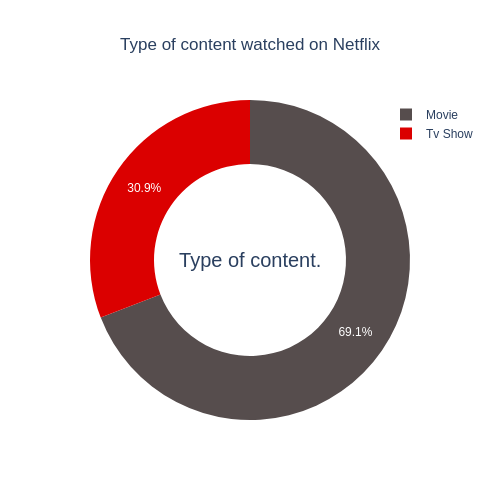

In [19]:
# Create a pie chart for Type.
colors = ['	#db0000', '	#564d4d']
labels = ['Tv Show', 'Movie']
tv_show = netflix_data.type.value_counts()[1]
movie = netflix_data.type.value_counts()[0]

fig = go.Figure(data=[go.Pie(labels=labels, values=[tv_show, movie], hole=.6)])
fig.update_layout(
    title_text="Type of content watched on Netflix",title_x=0.5, legend=dict(x=0.9),height=500, width=500,
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Type of content.', font_size=20, showarrow=False)])
fig.update_traces(marker=dict(colors=colors))

fig.show('png')

Interpretation: 69.1% of the content available on Netflix are movies; the remaining 30.9% are TV Shows.

# Year_added, Month_added, and Day_added:
Content growth over years:

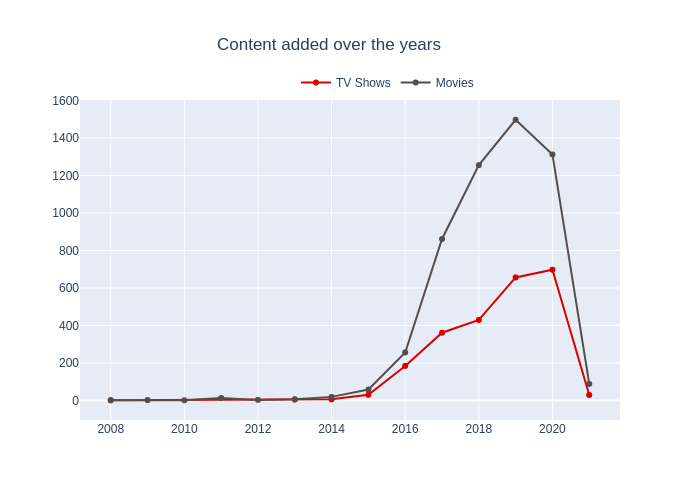

In [20]:
# Plot growth of the contents over the years.
tv_show = netflix_data[netflix_data["type"] == "TV Show"]
movie = netflix_data[netflix_data["type"] == "Movie"]

col = "year_added"

content_1 = tv_show[col].value_counts().reset_index()
content_1 = content_1.rename(columns = {col : "count", "index" : col})
content_1 = content_1.sort_values(col)

content_2 = movie[col].value_counts().reset_index()
content_2 = content_2.rename(columns = {col : "count", "index" : col})
content_2 = content_2.sort_values(col)

trace1 = go.Scatter(x=content_1[col], y=content_1["count"], name="TV Shows", marker=dict(color="#db0000"))
trace2 = go.Scatter(x=content_2[col], y=content_2["count"], name="Movies", marker=dict(color="#564d4d"))

data = [trace1, trace2]
layout = go.Layout(title="Content added over the years",title_x=0.47, legend=dict(x=0.4, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)

fig.write_image("images/content_added_over_year.png", scale=5)
fig.show('png')
# fig.show()

In [21]:
# Check why does it suddenly drop in 2021.
len(netflix_data[netflix_data['year_added'] == 2021])

117

Interpretation: 
1.Growth in the number of movies on Netflix is much higher than tv shows.
2.From 2015 we can see a noticeable addition in the number of movies and tv shows uploaded by Netflix on its platform.
3.The highest number of movies and tv shows got added in 2019 and 2020.
4.The line plot shows very few movies, and tv shows got added in 2021. It is due to very little data collected from the year 2021.

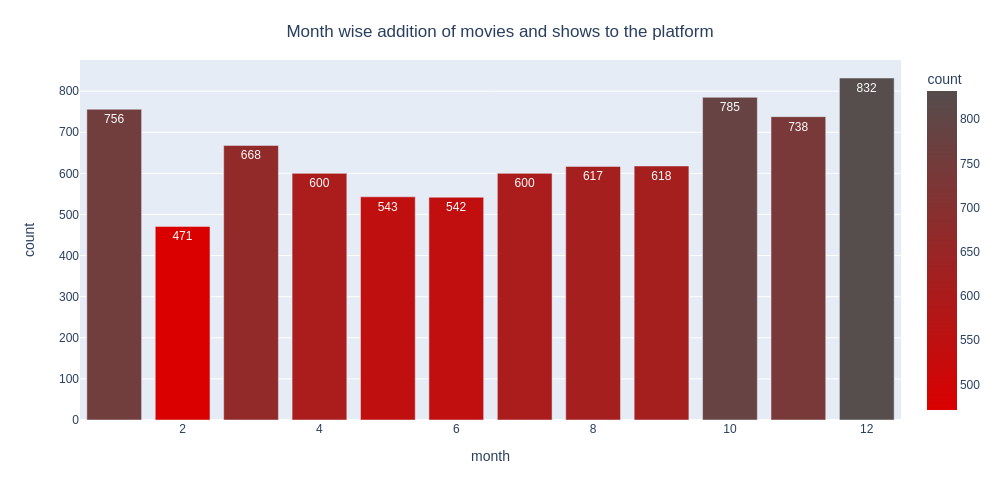

In [22]:
# Create dataframe to store month values and counts.
months_df = pd.DataFrame(netflix_data.month_added.value_counts())
months_df.reset_index(inplace=True)
months_df.rename(columns={'index':'month', 'month_added':'count'}, inplace=True)
fig = px.bar(months_df, x="month", y="count", text_auto=True, color='count', color_continuous_scale=['#db0000', '#564d4d'])
fig.update_layout(
    title={
        'text': 'Month wise addition of movies and shows to the platform',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        autosize=False,
        width=1000,
        height=500)
# fig.show()
fig.show('png')

Interpretation: 
Most of the content is uploaded either by year ending or beginning.
October, November, December, and January are months in which many shows and movies get uploaded to the platform.
It might be due to the winter, as in these months people may stay at home and watch shows and movies in their free time.

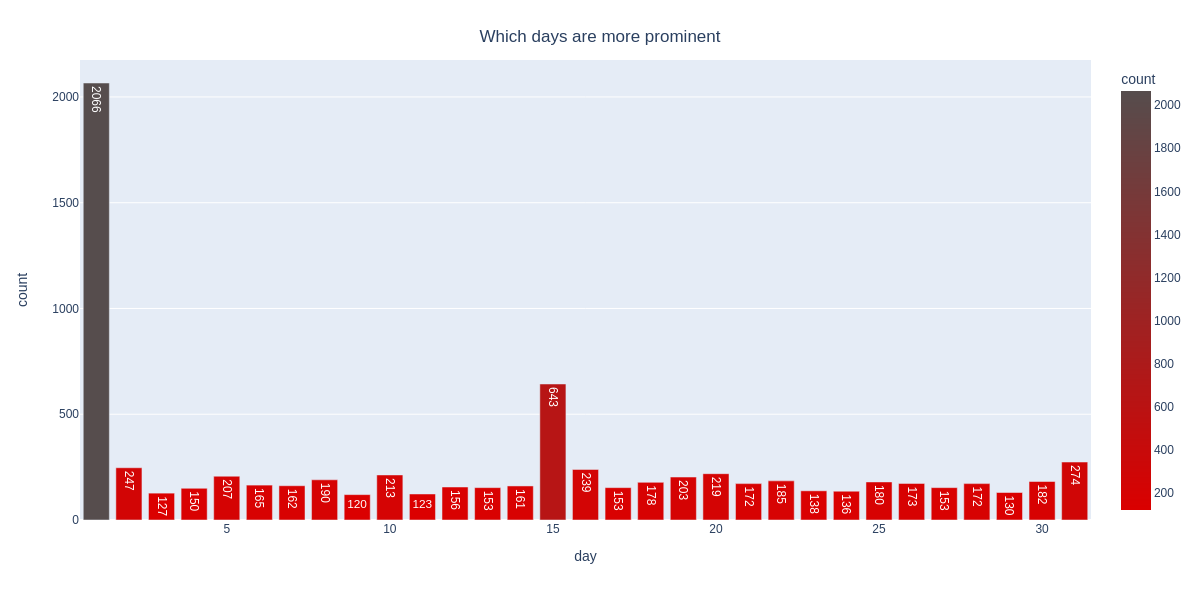

In [23]:
# Create dataframe to store day values and count.
days_df = pd.DataFrame(netflix_data.day_added.value_counts())
days_df.reset_index(inplace=True)
days_df.rename(columns={'index':'day', 'day_added':'count'}, inplace=True)
fig = px.bar(days_df, x="day", y="count", text_auto=True, color='count', color_continuous_scale=['#db0000', '#564d4d'])
fig.update_layout(
    title={
        'text': 'Which days are more prominent',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        autosize=False,
        width=1200,
        height=600)
# fig.show()
fig.show('png')

Interpretation : Most of the content is uploaded at the beginning, middle, or the end of a month.
Which makes 1st, 15th or 31st of a month more prominent in getting new tv shows and movies

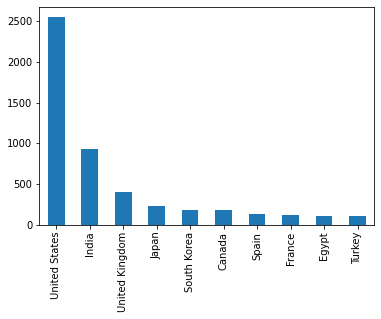

In [24]:
Top_ten =netflix_data['country'].value_counts().sort_values(ascending=False).head(10)
Top_ten =Top_ten.plot( x= 'Regioncountry' ,kind= 'bar')


Interpretation :The majority of the content providers are in the above top-ten countries.
Among which USA, India, and Uk create more than half of the tv shows and movies on the platform.

In [25]:
# Put the data into bins.
release_yr_bin = pd.cut(netflix_data.release_year, [1924, 1999, 2010, 2021])
release_yr_bin.value_counts()
release_yr_bin = pd.DataFrame(release_yr_bin.value_counts()).reset_index()
release_yr_bin.rename(columns={'index':'year_interval', 'release_year':'count'}, inplace=True)
release_yr_bin['year_interval'] = release_yr_bin['year_interval'].astype('string')
release_yr_bin

,year_interval,count
0,"(2010, 2021]",6425
1,"(1999, 2010]",896
2,"(1924, 1999]",449


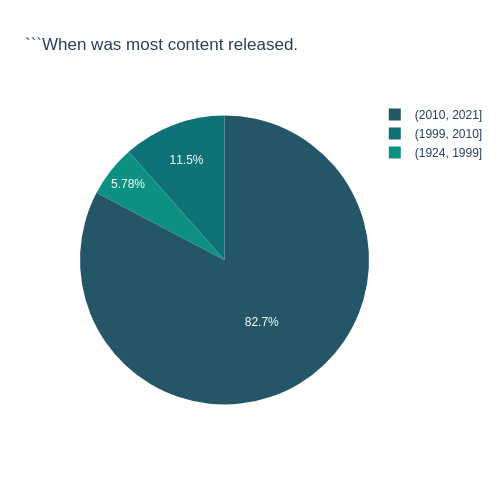

In [26]:
# Plot it.
fig = px.pie(release_yr_bin, values='count', names='year_interval', color_discrete_sequence=px.colors.sequential.Aggrnyl, title='```When was most content released.',height=500, width=500)
# fig.show()
fig.show('png')

Interpretation : 82% of the content available was released between 2010 and 2021.
17.28% of the content available was released before 2010.

# **creating a wordcloud to see which words appear the most in the titles for movies and tv shows.**

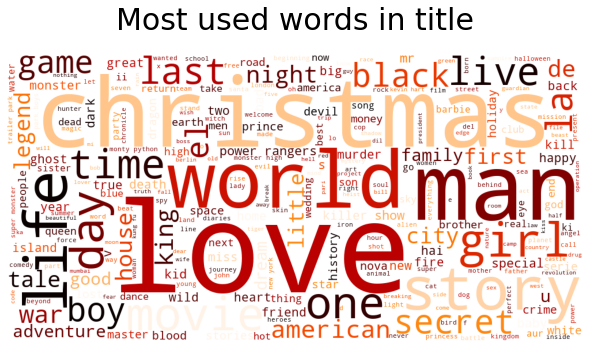

In [27]:
# Import the required libraries.
from wordcloud import WordCloud, STOPWORDS 

# Create a string to store all the words.
comment_words = ''

# Remove the stopwords.
stopwords = set(STOPWORDS)
 
# iterate through the column.
for val in netflix_data.title:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 1000, height = 500,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10,
                max_words = 1000,
                colormap = 'gist_heat_r').generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.title('Most used words in title', fontsize = 30, pad=25)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

Interpretation : Most repeated words in title include Christmas, Love, World, Man, and Story.
We saw that most of the movies and tv shows got added during the winters, which tells why Christmas appeared many times in the titles

# Similarly creating wordcloud for description to see which words appear the most.

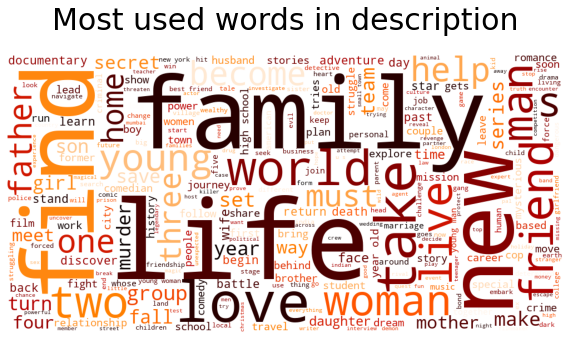

In [28]:
# Create a string to store all the words.
comment_words = ''

# Remove the stopwords.
stopwords = set(STOPWORDS)
 
# iterate through the column.
for val in netflix_data.description:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 1000, height = 500,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10,
                max_words = 1000,
                colormap = 'gist_heat').generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.title('Most used words in description', fontsize = 30, pad=25)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()


Interpretation : Most occurring words in the description of the tv shows and movies are Family, Friend, Love, Life, Woman, Man.

**Which directors have most number of the movies and tv shows?**

In [29]:
# Replace the null values in director.
netflix_data['director']=netflix_data['director'].fillna('')

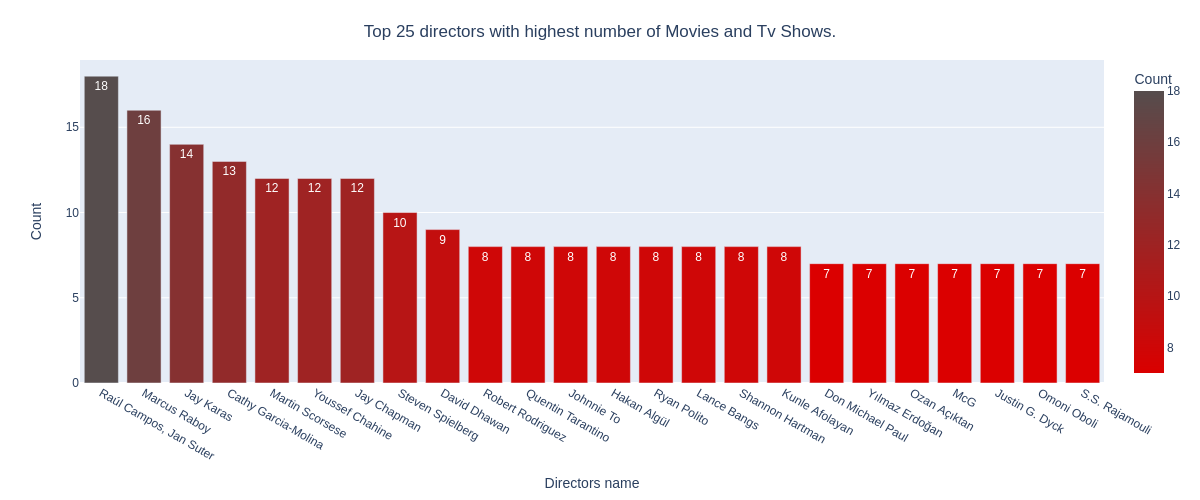

In [30]:
directors_list = netflix_data.director.value_counts().reset_index().head(25)[1:]  # We will not include the null values.
directors_list.rename(columns={'index':'Directors name', 'director':'Count'}, inplace=True)
fig = px.bar(directors_list, x='Directors name', y='Count', text_auto=True,
             color='Count', color_continuous_scale=['#db0000', '#564d4d'])

fig.update_traces(textangle=0, cliponaxis=False)
fig.update_layout(
    title={
        'text': 'Top 25 directors with highest number of Movies and Tv Shows.',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        autosize=False,
        width=1200,
        height=500)
# fig.show()
fig.show('png')

Interpretation : Raúl Campos, Jan Suter, Marcus Raboy, Jay Karas, Cathy Garcia-Molina, Jay Chapman are the top 5 directors which highest number of movies and tv shows

In [31]:
# Create a list of all the actors in the data.
def data2list(data):
  actor_list = {}  # dict to store the count for each actor.
  temp_list = []   # list to store all the names.
  cast_list = list(data['cast'])  # define the data we intend to use.
  for i in range(len(cast_list)):
    temp_list.extend(str(cast_list[i]).split(','))
  for i in temp_list:
    if i not in actor_list:
      actor_list[i] = temp_list.count(i)
  return actor_list
# Create dataframe for list of actors.
actor_list = pd.DataFrame([data2list(netflix_data)]).T.reset_index()
actor_list = actor_list.sort_values(0, ascending=False).drop(106)

In [32]:
actor_list.head(10)

,index,0
1294,Anupam Kher,38
194,Takahiro Sakurai,28
2203,Om Puri,27
4039,Shah Rukh Khan,27
740,Boman Irani,25
2506,Paresh Rawal,24
8462,Andrea Libman,24
4368,Yuki Kaji,23
4994,Vincent Tong,22
2201,Akshay Kumar,22


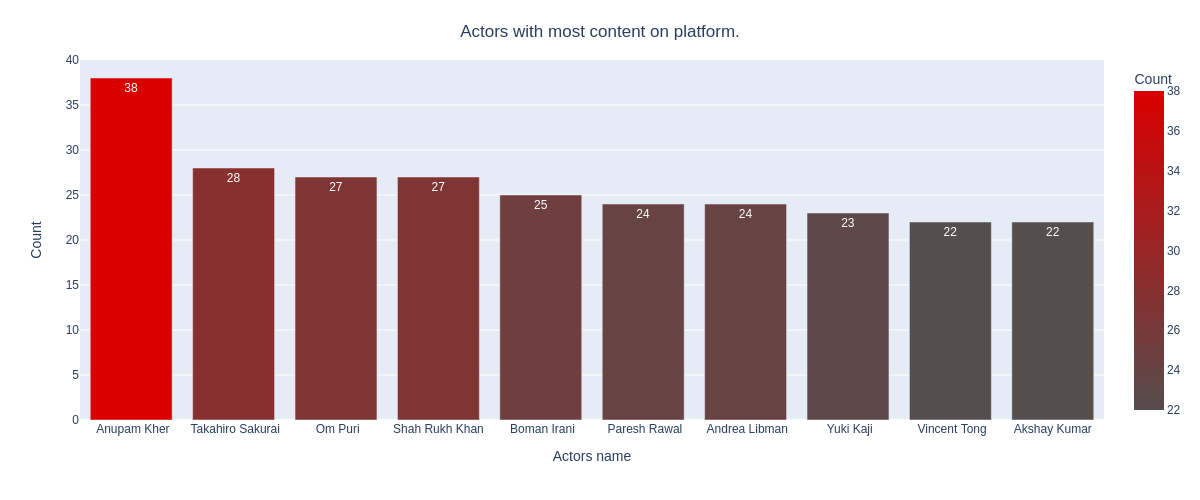

In [33]:
# Plot it.
top_10_actors = actor_list.head(10)
top_10_actors.rename(columns={'index':'Actors name', 0:'Count'}, inplace=True)

fig = px.bar(top_10_actors, x='Actors name', y='Count', text_auto=True,
             color='Count', color_continuous_scale=['#564d4d', '#db0000'])

fig.update_traces(textangle=0, cliponaxis=False)
fig.update_layout(
    title={
        'text': 'Actors with most content on platform.',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        autosize=False,
        width=1200,
        height=500)
# fig.show()
fig.show('png')

Interpretation : Happy to see 6 of the actors in the top ten list of most numbers tv shows and movies are from India.

In [34]:
# Replace the null values in cast.
netflix_data['cast']=netflix_data['cast'].fillna('')

What kind of content is available in different countries in recent years?

In [35]:
netflix_data['country'].fillna('United States', inplace=True)
netflix_data['country_single'] = netflix_data['country'].apply(lambda x: x.split(",")[0])
country_order = netflix_data['country_single'].value_counts()[:10].index
countryVScontent = netflix_data[['type', 'country_single']].groupby('country_single')['type'].value_counts().unstack().loc[country_order].reset_index()
countryVScontent

type,index,Movie,TV Show
0,United States,2326.0,1053.0
1,India,883.0,73.0
2,United Kingdom,341.0,235.0
3,Canada,175.0,84.0
4,Japan,75.0,160.0
5,France,137.0,59.0
6,South Korea,42.0,152.0
7,Spain,119.0,49.0
8,Mexico,79.0,44.0
9,Australia,56.0,50.0


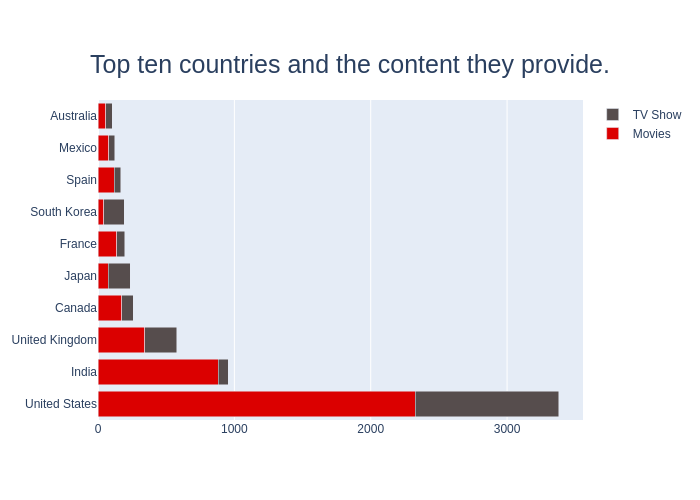

In [36]:
# Plot the above data.
fig = go.Figure()
fig.add_trace(go.Bar(
    y=countryVScontent['index'],
    x=countryVScontent['Movie'],
    name='Movies',
    orientation='h',
    marker=dict(
        color='rgba(219, 0, 0, 1)'
    )
))
fig.add_trace(go.Bar(
    y=countryVScontent['index'],
    x=countryVScontent['TV Show'],
    name='TV Show',
    orientation='h',
    marker=dict(
        color='rgba(86, 77, 77, 1)'
    )
))

fig.update_layout(barmode='stack',
                   title={'text': 'Top ten countries and the content they provide.',
                          'y':0.89,
                          'x':0.5,
                          'font_size':25,
                          'xanchor': 'center',
                          'yanchor': 'top'}
                  )
# fig.show()
fig.show('png')

Interpretation : The United States is a leading producer of both types of content; this makes sense since Netflix is a US company.

The influence of Bollywood in India explains the type of content available, and perhaps the main focus of this industry is Movies and not TV Shows.

On the other hand, TV Shows are more frequent in South Korea, which explains the KDrama culture nowadays.

**lets find which Genre is more popular in these countries.**

In [37]:
# Create subset of dataset with required data.
conuntryVSgenre = netflix_data[['country', 'listed_in']]

# Create a function to seperate all genres and store counts for each.
def country_wise_genre(country):
  country_genre = conuntryVSgenre[conuntryVSgenre['country'] == country]
  country_genre = ", ".join(country_genre['listed_in'].dropna()).split(", ")
  country_genre_dict = dict(Counter(country_genre))
  return country_genre_dict

# Define list of top ten countries.
country_list = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain', 'Mexico', 'Australia']
# Create an empty dict to store values of each genre for each country.
country_wise_genre_dict = {}
# Iterate through all values in country_list.
for i in country_list:
  genre_data = country_wise_genre(i)
  country_wise_genre_dict[i] = genre_data
  country_genre_count_df = pd.DataFrame(country_wise_genre_dict).reset_index()
  country_genre_count_df.rename({'index':'Genre'}, inplace=True, axis=1)

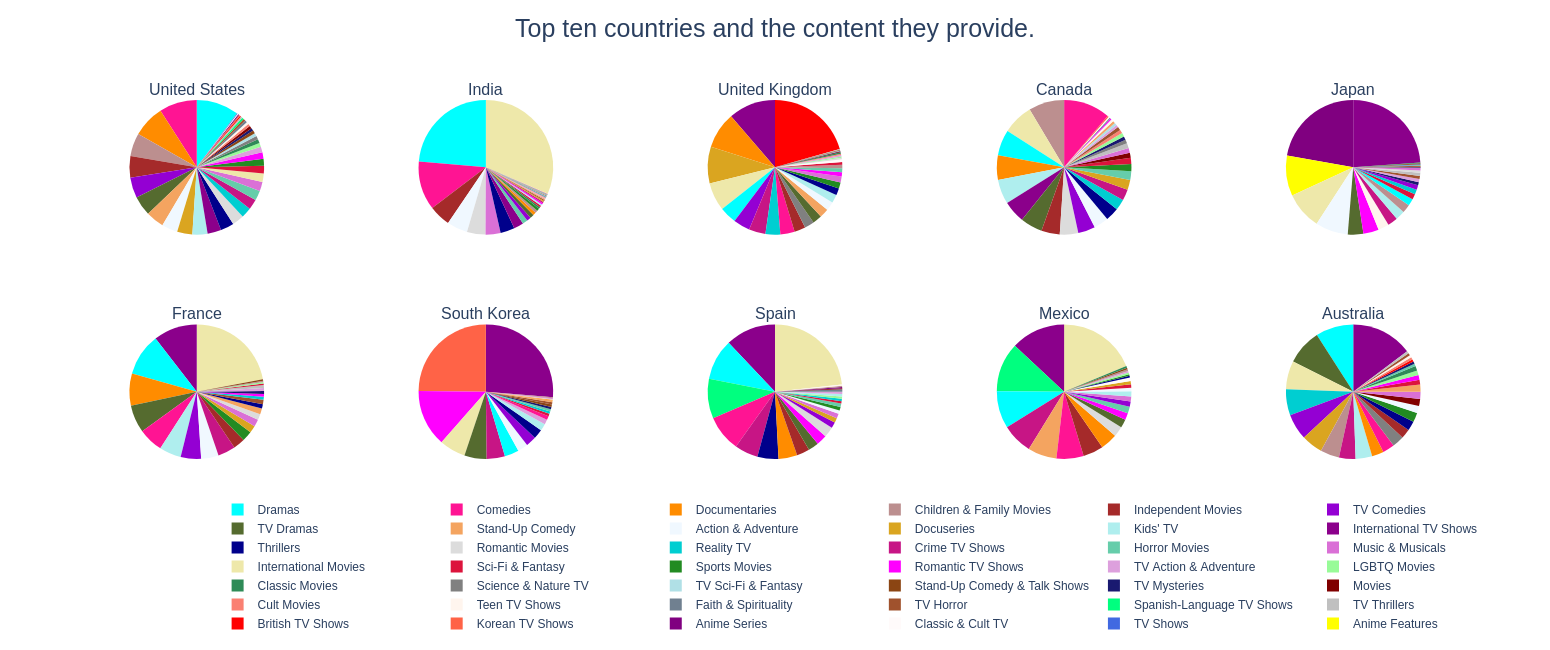

In [38]:
# Plot the above data.
df = country_genre_count_df

# Define colours to be used.
colors = ['aliceblue', 'brown', 'crimson', 'cyan', 'darkblue', 'darkmagenta', 'darkolivegreen', 'darkorange', 'darkturquoise', 'darkviolet', 'deeppink', 'forestgreen',
          'fuchsia', 'gainsboro', 'goldenrod', 'gray','maroon', 'mediumaquamarine', 'mediumvioletred', 'midnightblue', 'orchid', 'palegoldenrod', 'palegreen', 'paleturquoise',
          'plum', 'powderblue', 'purple', 'red', 'rosybrown', 'royalblue', 'saddlebrown', 'salmon', 'sandybrown','seagreen', 'seashell', 'sienna', 'silver', 'slategray', 'snow',
          'springgreen', 'tomato','yellow', 'yellowgreen']

# Create subplots, using 'domain' type for pie charts
specs = [[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}]]
fig = make_subplots(rows=2, cols=5, specs=specs, subplot_titles=['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain', 'Mexico', 'Australia'])

# Define traces.
fig.add_trace(go.Pie(labels=df['Genre'], values=df['United States'], name='United States'),1,1)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['India'],  name='India'),1,2)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['United Kingdom'],  name='United Kingdom'),1,3)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['Canada'],  name='Canada'),1,4)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['Japan'],  name='Japan'),1,5)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['France'],  name='France'),2,1)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['South Korea'],  name='South Korea'),2,2)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['Spain'],  name='Spain'),2,3)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['Mexico'],  name='Mexico'),2,4)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['Australia'],  name='Australia'),2,5)

# Tune layout and hover info
fig.update_traces(hoverinfo='label+percent+name', textinfo='none', marker=dict(colors=colors))
fig.update_layout(title={'text': 'Top ten countries and the content they provide.',
                          'y':0.97,
                          'x':0.5,
                          'font_size':25,
                          'xanchor': 'center',
                          'yanchor': 'top'},height=650, width=1550,paper_bgcolor='white',
                  legend=dict(x=0.099,orientation="h")
                          )
fig = go.Figure(fig)
# fig.show()
fig.show('png')

Interpretation : Drama, International Movies, and Comedies seem popular choices in most countries.
British and International Tv Shows dominate in the United Kingdom.
Regional specialties such as Anime in Japan and Korean Tv shows in South Korea are more prominent in these countries; This makes sense as anime has always been popular in Japan, and the rising k-pop culture explains the increase in Korean Tv Shows.
It's also observed that in the countries where the regional language is not English, International Tv Shows and Movies are more in demand.

# **Hypothesis Testing to check is there is any relation between year_added and type:**

**Is Netflix has increasingly focusing on TV rather than movies in recent years?**

**Null Hypothesis:** year_added has no impact on type of content that gets added to the platform.

**Alternative Hypothesis:** year_added has impact on type of content that gets added to the platform.

**Set significance level to 0.05.**

In [39]:
hypo_data = pd.crosstab(netflix_data['type'], netflix_data['year_added'], margins=False)
hypo_data

year_added,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
type,,,,,,,,,,,,,,
Movie,1,2,1,13,3,6,19,58,256,861,1255,1497,1312,88
TV Show,1,0,0,0,0,5,6,30,184,361,429,656,697,29


In [41]:
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(hypo_data)
p

7.478336952750899e-11

**Interpretation :The p value is smaller than significance level , we will reject the null hypothesis and accept the alternative hypothesis.**

In [42]:
# Now lets check what type of content got added in the past few years.

'''We will only check for the type of genres that got added in the years 2018-2021 for better visualization. '''

# Create subset of data with required columns.
recent_years = pd.DataFrame(netflix_data.groupby(['year_added', 'listed_in'])['listed_in'].count())
recent_years.rename(columns={'listed_in':'Count'}, inplace=True)
recent_years = recent_years.reset_index()
recent_years.drop(recent_years[recent_years.year_added < 2018].index, inplace=True)

''' There are many rows with multiple genre entries therefore we will
 create a function to split each of them and get their respective counts.'''
 
def seperate_all_genre(year):
  year_added = recent_years[recent_years['year_added'] == year]
  year_added = ", ".join(year_added['listed_in'].dropna()).split(", ")
  year_added_dict = dict(Counter(year_added))
  return year_added_dict
# Create a list of years.
yr_list = [2018,2019,2020,2021]
# Iterate through all values in yr_list.
yr_genre_count_list = {}
for i in yr_list:
  data = seperate_all_genre(i)
  yr_genre_count_list[i] = data
  yr_genre_count_df = pd.DataFrame(yr_genre_count_list).reset_index()
  yr_genre_count_df.rename({'index':'Genre'}, inplace=True, axis=1)

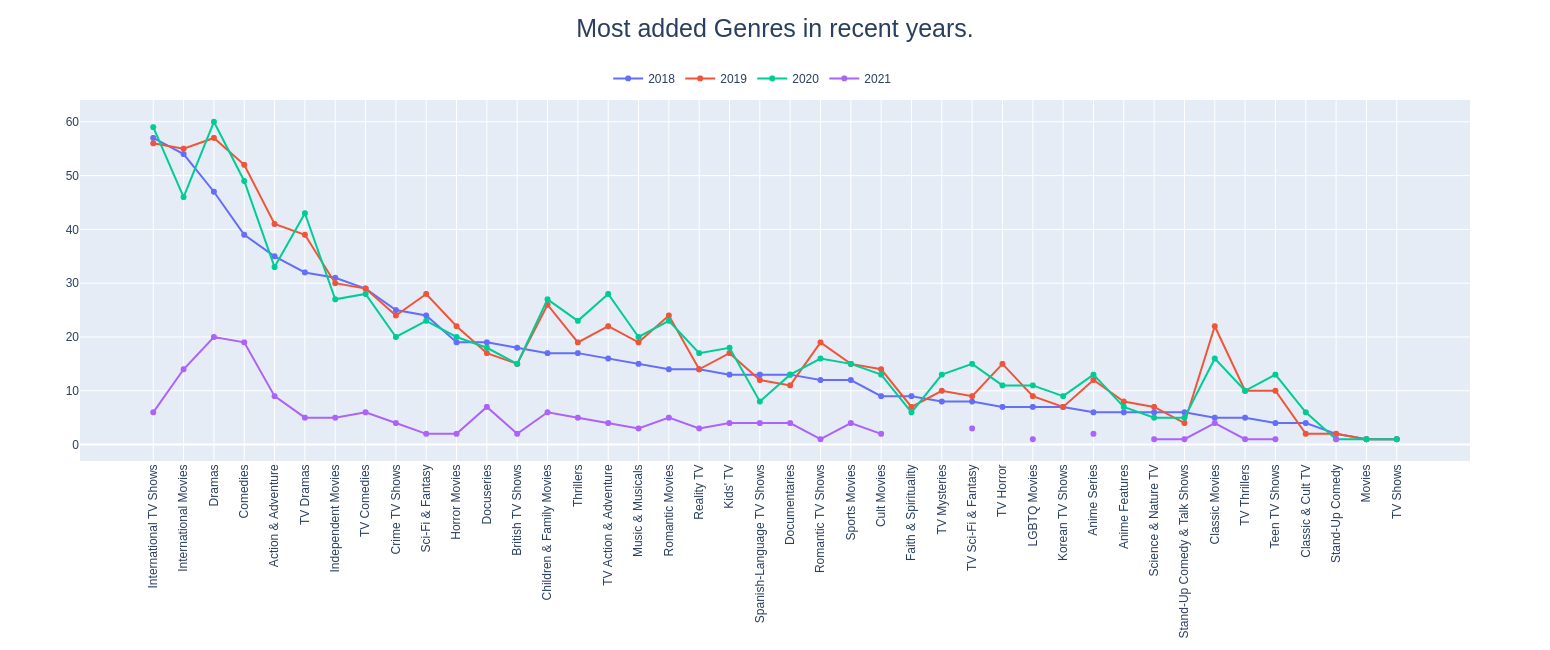

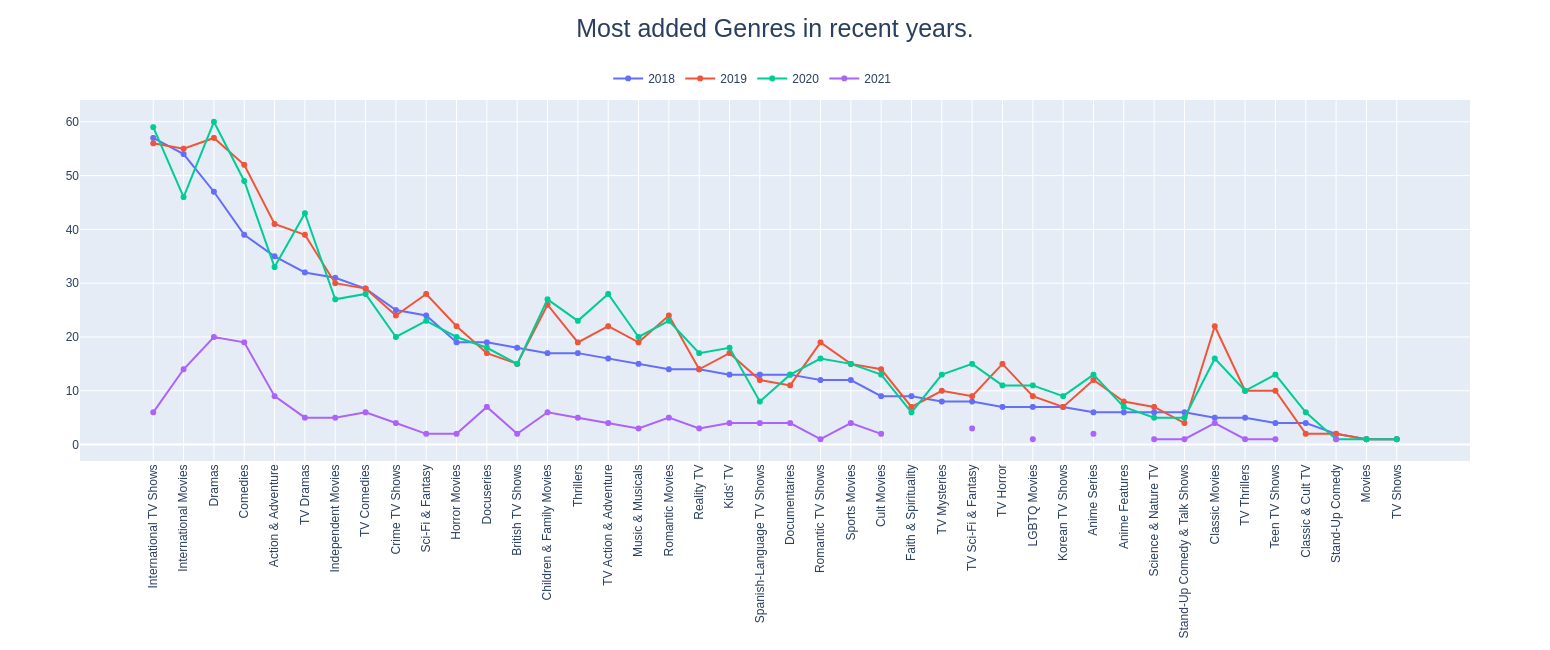

In [44]:
# Plot the above data.
df = yr_genre_count_df.sort_values([2018,2019,2020,2021],ascending=False)
fig = go.Figure()
fig.add_trace(go.Scatter(y=df[2018], x=df['Genre'],
                    mode='lines+markers',
                    name=2018))
fig.add_trace(go.Scatter(y=df[2019], x=df['Genre'],
                    mode='lines+markers',
                    name=2019))
fig.add_trace(go.Scatter(y=df[2020], x=df['Genre'],
                    mode='lines+markers', 
                    name=2020))
fig.add_trace(go.Scatter(y=df[2021], x=df['Genre'],
                    mode='lines+markers', 
                    name=2021))
fig.update_xaxes(tickangle=-90)
fig.update_layout(title={'text': 'Most added Genres in recent years.',
                          'y':0.97,
                          'x':0.5,
                          'font_size':25,
                          'xanchor': 'center',
                          'yanchor': 'top'},height=650, width=1550,legend=dict(x=0.38, y=1.1, orientation="h"))

# fig.show()
fig.show('png')

Interpretation : The first thing that comes to my mind when I hear Netflix is Tv Shows, and to be honest, I rarely watch any movies on the platform.

From the EDA we did in the beginning, we saw that there are more Movies than Tv Shows on Netflix, which might be enough to assume that Netflix focuses more on Movies than Tv Shows. But the data proves this assumption wrong.

The above line plot shows that Netflix has been adding many International Tv Shows, Tv Dramas, Tv Comedy Shows and many more tv shows in the recent years compared to Movies.

From this observation, we can say that Netflix might be shifting slowly towards Tv Shows.

In [47]:
# Create subsets for tv shows and movies.
tv_shows = netflix_data[netflix_data['type'] == 'TV Show']
movies = netflix_data[netflix_data['type'] == 'Movie']

# Select the durations for both.
duration_tv_shows = tv_shows['duration'].reset_index()
duration_movies = movies['duration'].reset_index()

# Remove string values from tv shows duration.
duration_tv_shows.duration = duration_tv_shows.duration.str.replace(' Season', '') \
                                                       .str.replace(' Seasons', '') \
                                                       .str.replace('s', '')                                                       
duration_tv_shows.duration = duration_tv_shows.duration.astype(str).astype(int)

# Remove string values from movie duration.
duration_movies.duration = duration_movies.duration.str.replace(' min', '')                                                       
duration_movies.duration = duration_movies.duration.astype(str).astype(int)


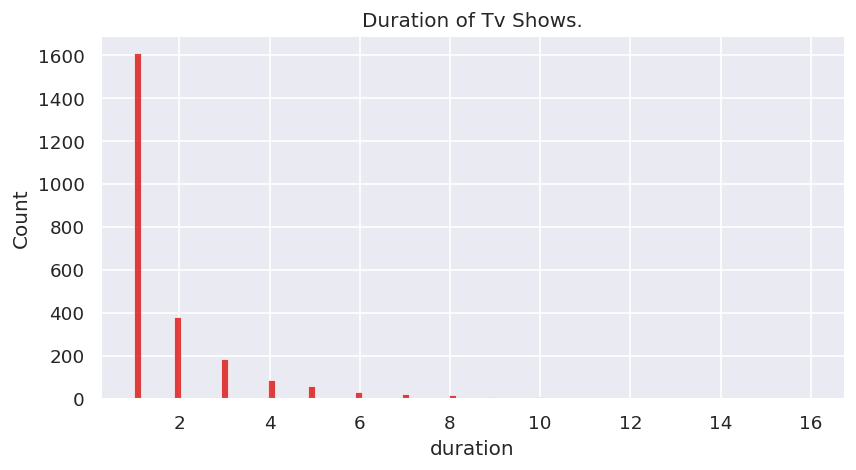

In [46]:
# Plot the above durations.
plt.figure(figsize=(8,4), dpi=120)
sns.set(style="darkgrid")
sns.histplot(data=duration_tv_shows['duration'], color='#db0000')
plt.title('Duration of Tv Shows.')
plt.show()

**Interpretation : Most of the Tv Shows last for 1 or 2 seasons, it is rare for a show to have more than 5 seasons.**

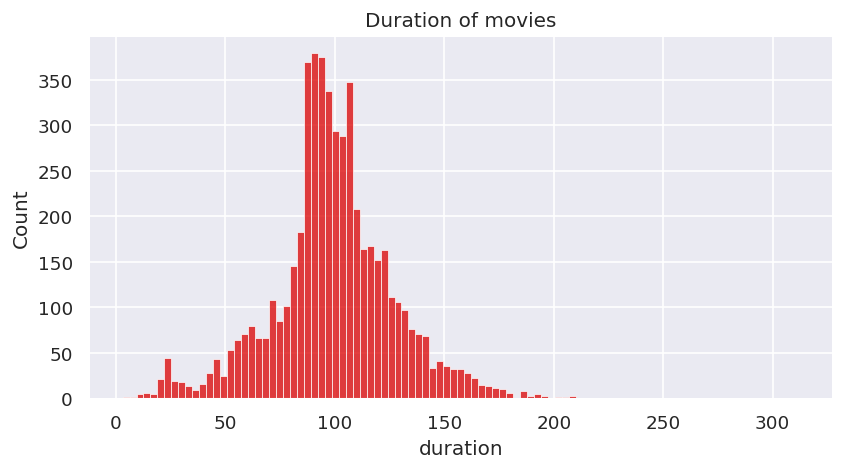

In [48]:
plt.figure(figsize=(8,4), dpi=120)
sns.set(style="darkgrid")
sns.histplot(data=duration_movies['duration'], color='#db0000')
plt.title('Duration of movies')
plt.show()

**Interpretation : Most of the movies last for 90 to 120 minutes.**

# **Rating: **

In [49]:
movies_rating = dict(movies['rating'].value_counts())
tv_shows_rating = dict(tv_shows['rating'].value_counts())

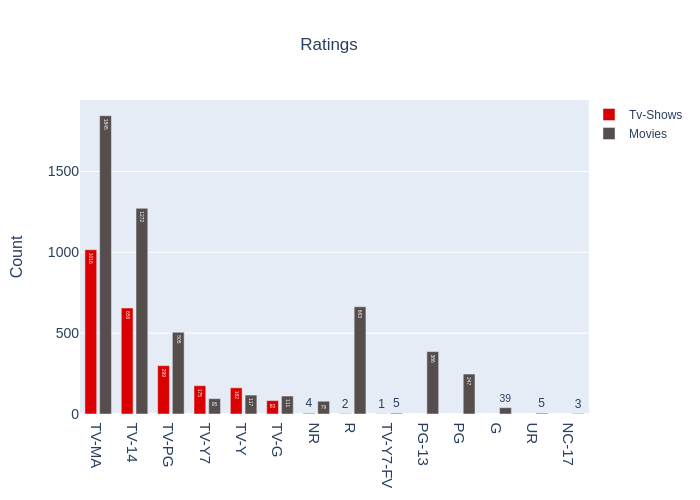

In [50]:
# Plot the count of ratings for Tv shows and movies to understand them better.
fig = go.Figure()
fig.add_trace(go.Bar(x=list(tv_shows_rating.keys()),
                y=list(tv_shows_rating.values()),
                text=list(tv_shows_rating.values()),
                name='Tv-Shows',
                marker_color='rgb(219,0,0)'
                ))
fig.add_trace(go.Bar(x=list(movies_rating.keys()),
                y=list(movies_rating.values()),
                text=list(movies_rating.values()),
                name='Movies',
                marker_color='rgb(86,77,77)'
                ))

fig.update_layout(
    title='Ratings',title_x=0.47,
    xaxis_tickfont_size=15,
    yaxis=dict(
        title='Count',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=1,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.19,
    bargroupgap=0.2 
)
# fig.show()
fig.show('png')

Interpretations : TV-MA tops the charts, indicating that mature content is more popular on Netflix.

This popularity is followed by TV-14 and TV-PG, which are Shows focused on Teens and Older kids.

Very few titles with a rating NC-17 exist. It can be understood since this type of content is purely for the audience above 17.

# **Data Preprocessing:**
I will be using text columns to create clusters for our data.